In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv("./abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
# 컬렴명 확인
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Rings')

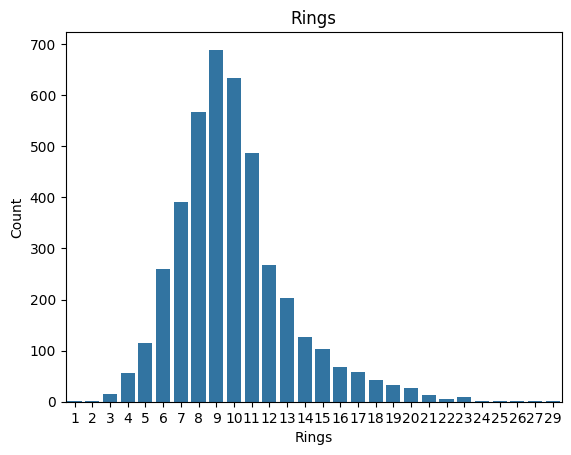

In [4]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings")

In [5]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [6]:
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [7]:
#get_dummines()를 사용한 원핫 인코더 - True, False 로 나옴 
#df_encoded = pd.get_dummies(df, columns=['Sex'], prefix='Sex')
#print(df_encoded.head())

In [8]:
encoder = OneHotEncoder()
sex_encoded = encoder.fit_transform(df[['Sex']]).toarray()

# 인코딩된 Sex 컬럼을 데이터프레임으로 변환 후 기존 컬럼에 추가
sex_columns = encoder.get_feature_names_out(['Sex'])
sex_df = pd.DataFrame(sex_encoded, columns=sex_columns)
df = pd.concat([df, sex_df], axis=1)

# 필요 없는 원래 Sex 컬럼 삭제
df = df.drop(columns=['Sex'])

In [9]:
df

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1.0,0.0,0.0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0.0,0.0,1.0
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0.0,0.0,1.0
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1.0,0.0,0.0


In [10]:
X=df.drop('Rings',axis=1)
X.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0


In [11]:
y=df['Rings']
y.value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print('평균제곱근오차', mean_squared_error(ly_preds, y_test))

#사용자 정의 평균제곱근 오차
def mse_np(actual, predicted):
    return np.mean((np.array(actual) - np.array(predicted)) ** 2)

print('평균제곱근오차', mse_np(ly_preds, y_test))

#사용자 정의 평균제곱근 오차
def mse(actual, predicted):
    sum_square_error = sum((a - p) ** 2 for a, p in zip(actual, predicted))
    mean_square_error = sum_square_error / len(actual)
    return mean_square_error

print('평균제곱근오차', mse(ly_preds, y_test))

평균제곱근오차 5.007938896069686
평균제곱근오차 5.007938896069686
평균제곱근오차 5.007938896069686


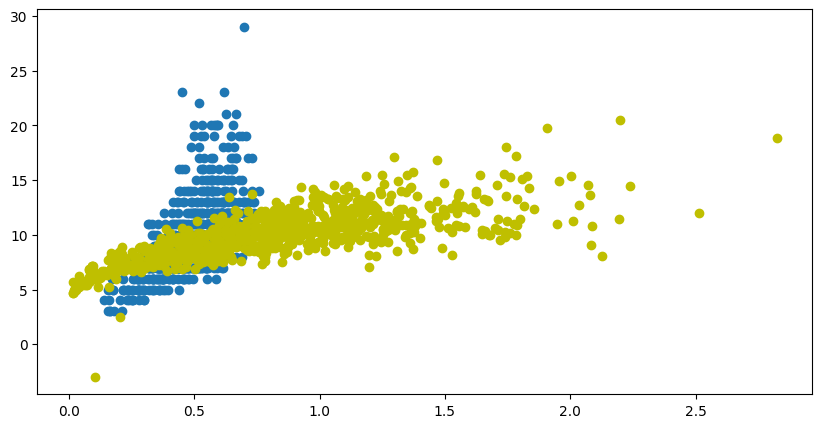

In [17]:
# 예측값과 실제 값 차이를 산접도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='y_test')
plt.scatter(X_test['Whole_weight'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()         

In [18]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, y_test))

평균제곱근오차 9.198564593301436


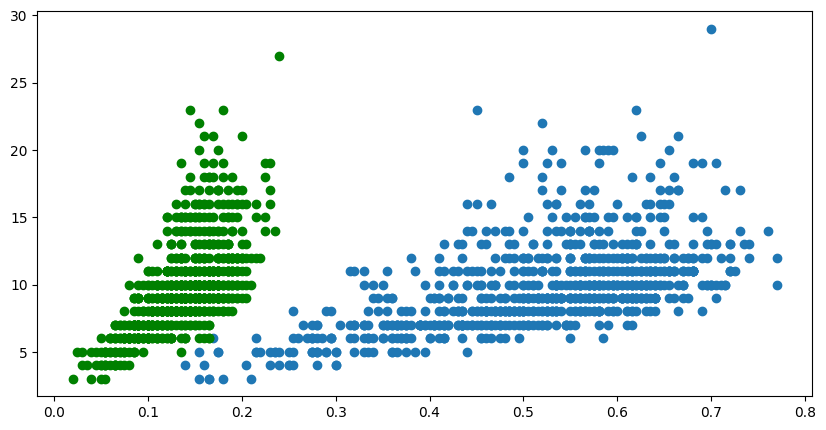

In [19]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='y_test')
plt.scatter(X_test['Height'], dy_preds, c='g', label='dy_preds')
plt.show()  

In [20]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 4.664501794258373


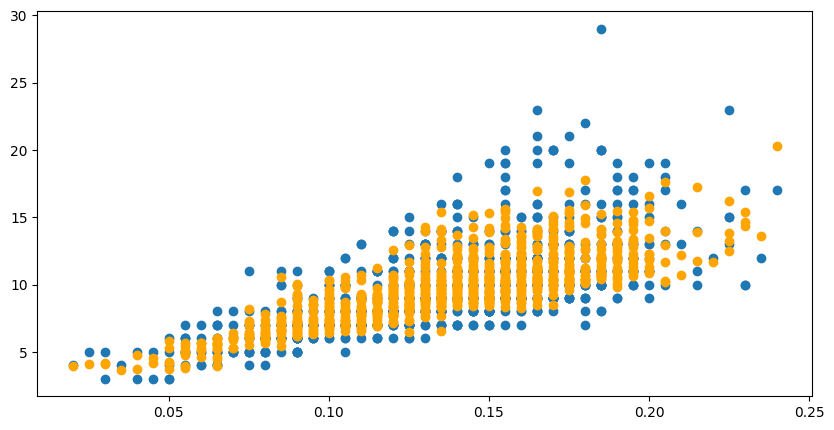

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Height'], y_test, label='y_test')
plt.scatter(X_test['Height'], ry_preds, c='orange', label='ry_preds')

plt.show()   

In [22]:
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, y_test))

평균제곱근오차 5.568562909111201


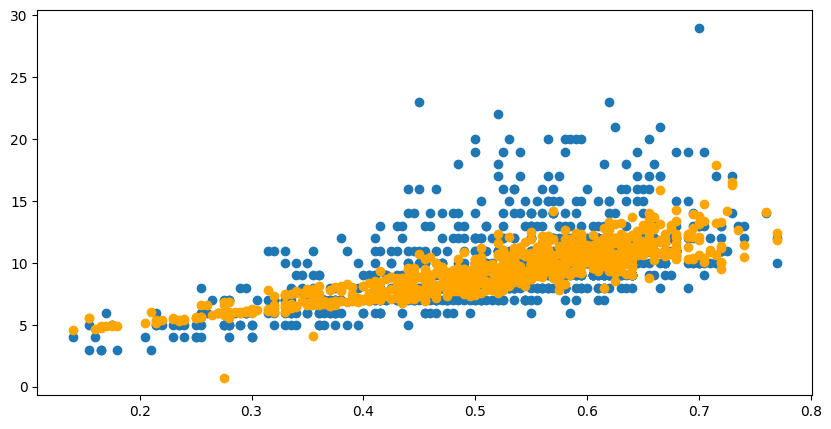

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(X_test['Length'], y_test, label='y_test')
plt.scatter(X_test['Length'], ry_preds, c='orange', label='ry_preds')

plt.show()  